# Description
Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads. The main focus in this dataset is relationship between genre, reviews and user_rating.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Gathering

In [2]:
amazon_book = pd.read_csv('bestsellers with categories.csv')

# Assessment
### Visualization

In [3]:
amazon_book.head()
#Note:
# change all the name column and values into lowercase.
# make two columns from genre : Non Fiction and Fiction


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [4]:
amazon_book.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [5]:
amazon_book.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

### Programmatic

In [6]:
amazon_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 23.7+ KB


In [7]:
amazon_book.describe()
# Quite strange when the Price column's min is 0, so we have to check it 

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
amazon_book.loc[amazon_book['Price'] == 0]
#Note: 
#it doesn't make sense the book price is 0 unless it says in the data: the book had been discount.
#drop the value of from Price which is 0 values.

,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [9]:
amazon_book.Price.value_counts()

8      52
6      38
9      38
5      36
11     35
4      32
14     30
13     29
10     28
12     27
7      23
15     21
16     20
17     19
20     17
18     14
0      12
46     10
21      9
28      6
22      6
40      5
23      5
24      5
2       5
30      5
19      4
27      4
25      2
32      2
105     2
82      1
36      1
39      1
42      1
52      1
53      1
3       1
54      1
1       1
Name: Price, dtype: int64

In [10]:
amazon_book.duplicated().any().sum()
# Note: There is not duplicated value in the datasets

0

In [11]:
amazon_book.isnull().sum()
# Note: There is not null value in the datasets

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

## Quality:
- change all the name column and values into lowercase.

- drop the value of from Price which is 0 values.

- add underscore in user rating column

# CLEAN

In [12]:
amazon_book_clean = amazon_book.copy()

#### define
-change all the name column and values into lowercase.

##### code

In [13]:
amazon_book_clean.columns = amazon_book_clean.columns.str.lower()
amazon_book_clean = amazon_book_clean.apply(lambda x: x.str.lower() if(x.dtype == 'object') else x)

##### test


In [14]:
amazon_book_clean.head()

,name,author,user rating,reviews,price,year,genre
0,10-day green smoothie cleanse,jj smith,4.7,17350,8,2016,non fiction
1,11/22/63: a novel,stephen king,4.6,2052,22,2011,fiction
2,12 rules for life: an antidote to chaos,jordan b. peterson,4.7,18979,15,2018,non fiction
3,1984 (signet classics),george orwell,4.7,21424,6,2017,fiction
4,"5,000 awesome facts (about everything!) (natio...",national geographic kids,4.8,7665,12,2019,non fiction


#### define
- drop the value of from Price which is 0 values

#### code

In [15]:
df = amazon_book_clean

In [16]:
df = df.drop(df[df['price']==0].index)
df.price.value_counts()
df.loc[df['price'] == 0].sum()


name           0.0
author         0.0
user rating    0.0
reviews        0.0
price          0.0
year           0.0
genre          0.0
dtype: float64

#### test

In [17]:
df.price.value_counts()

8      52
6      38
9      38
5      36
11     35
4      32
14     30
13     29
10     28
12     27
7      23
15     21
16     20
17     19
20     17
18     14
46     10
21      9
22      6
28      6
24      5
23      5
30      5
40      5
2       5
19      4
27      4
105     2
25      2
32      2
82      1
36      1
39      1
42      1
52      1
53      1
3       1
54      1
1       1
Name: price, dtype: int64

#### define
-add underscore in user rating column

#### code 

In [18]:
df.columns = df.columns.str.replace(' ','_')

#### test

In [19]:
df.columns

Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')

# CLEAR DATASEST
#### Answer all question regarding this data.

In [20]:
df = df

# PART I

 ##### Question 1: What is percentage for Non Fiction Genre?

In [21]:
total = df.shape[0]
percentage_non = df.query('genre == "non fiction"').genre.count()/total
print(f"The percentage for non fiction genre is {percentage_non:.2%}")


The percentage for non fiction genre is 57.43%


##### Question 2: What is percentage for  Fiction Genre?

In [22]:
percentage_fiction = df.query('genre == "fiction"').genre.count()/total
print(f"The percentage for fiction genre is {percentage_fiction:.2%}")


The percentage for fiction genre is 42.57%


#### Question 3 : What is percentage for user_rating's score 4.8 from 2009 to 2019?

In [23]:
df.user_rating.value_counts()

4.8    119
4.7    107
4.6    103
4.5     60
4.9     51
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: user_rating, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 538 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         538 non-null    object 
 1   author       538 non-null    object 
 2   user_rating  538 non-null    float64
 3   reviews      538 non-null    int64  
 4   price        538 non-null    int64  
 5   year         538 non-null    int64  
 6   genre        538 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 27.3+ KB


In [25]:
percent_rating = df.query('user_rating == "4.8"').year.count()/total
print(f"The percentage for user rating score 4.8 for year 2009 to 2019 is {percent_rating:.2%}")

The percentage for user rating score 4.8 for year 2009 to 2019 is 22.12%


##### Question 4 : What is percentage for user_rating's score under 4.0 from 2009 to 2019?

In [26]:
percent_under_four = len(df.query('user_rating < 4.0'))/len(df)
print(f"The percentage for user rating score under 4.0 for year 2009 to 2019 is {percent_under_four:.2%}")

The percentage for user rating score under 4.0 for year 2009 to 2019 is 1.30%


#####  Question 5 : Which authors have the highest review?

In [27]:
author_reviews = df.groupby(['author', 'reviews']).count()
author_reviews.sort_values(by=['reviews'],ascending=False)
print(f"The auhtors have the highest review is Delia Owens")

The auhtors have the highest review is Delia Owens


#### Question 6: Whose are the most five authors in dataset? 

In [28]:
best_author = df['author'].value_counts()[:5]
best_author

gary chapman                          11
suzanne collins                       11
rick riordan                          11
american psychological association    10
gallup                                 9
Name: author, dtype: int64

# PART II VISUALIZATION DATA.
#### Find all the relationship between all variable in visualization display for stakeholder understand about this data in general. 

In [29]:
df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-day green smoothie cleanse,jj smith,4.7,17350,8,2016,non fiction
1,11/22/63: a novel,stephen king,4.6,2052,22,2011,fiction
2,12 rules for life: an antidote to chaos,jordan b. peterson,4.7,18979,15,2018,non fiction
3,1984 (signet classics),george orwell,4.7,21424,6,2017,fiction
4,"5,000 awesome facts (about everything!) (natio...",national geographic kids,4.8,7665,12,2019,non fiction


In [30]:
print(df.describe())

       user_rating       reviews       price         year
count   538.000000    538.000000  538.000000   538.000000
mean      4.615056  11971.776952   13.392193  2014.001859
std       0.228052  11750.508068   10.782447     3.187206
min       3.300000     37.000000    1.000000  2009.000000
25%       4.500000   4173.500000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17030.500000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


In [31]:
print(df['user_rating'].value_counts())

4.8    119
4.7    107
4.6    103
4.5     60
4.9     51
4.4     38
4.3     25
4.0     14
4.2      8
4.1      6
3.9      3
3.8      2
3.3      1
3.6      1
Name: user_rating, dtype: int64


## Univariate Exploration
I'll start by looking at the distribution of the main variable of interest: reviews

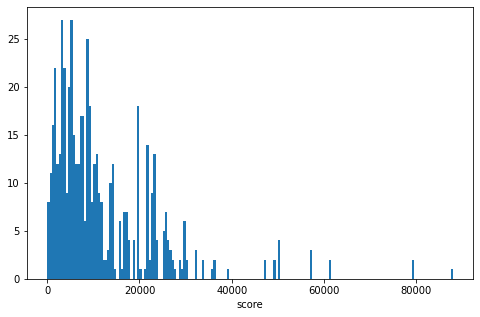

In [32]:
binsize = 500
bins = np.arange(0, df['reviews'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'reviews', bins = bins)
plt.xlabel('score')
plt.show()

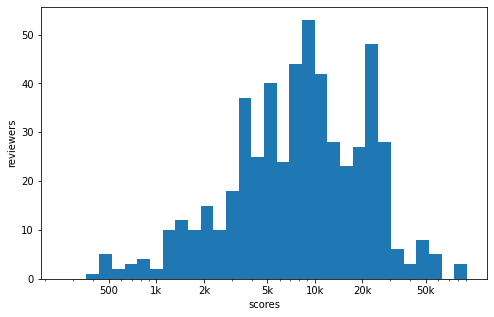

In [33]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.08
bins = 10 ** np.arange(2.4, np.log10(df['reviews'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'reviews', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k'])
plt.xlabel('scores')
plt.ylabel('reviewers')
plt.show()

reviews has a long-tailed distribution, with a lot of reviews between 8k to 10k. When plotted on a log-scale, the price distribution looks roughly bimodal, with one peak between 5k and 10k, and a second peak a little below 20k. Interestingly, there's a steep jump in frequency right before 20k, it is a rough ramp up.

Next up, the first predictor variable of interest: user_rating.

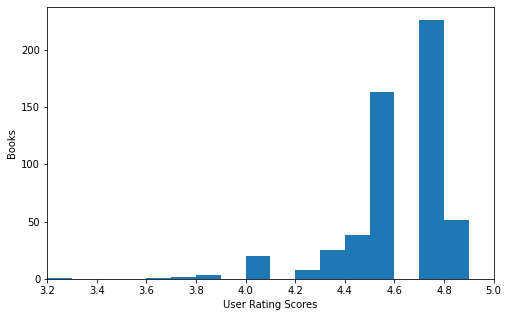

In [34]:
# plotting user_rating on a standard scale
binsize = 0.1
bins = np.arange(0, df['user_rating'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'user_rating', bins = bins)
plt.xlim([3.2, 5])
plt.xlabel('User Rating Scores')
plt.ylabel('Books')
plt.show()

There more than 200 books to be score 4.7.

c:\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='genre', ylabel='count'>

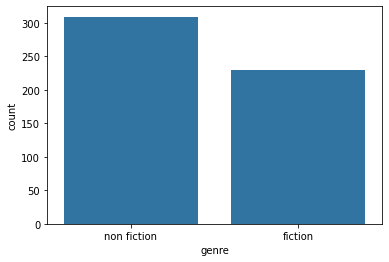

In [35]:
default_color = sns.color_palette()[0]
sns.countplot(df['genre'], color = default_color)

Non-fiction books is most best selling books genre in amazon from 2009-2019.  

## Bivariate Exploration
To start off with, I want to look at the pairwise correlations present between features in the data.

In [36]:
numeric_vars = ['user_rating', 'reviews']
categorical_vars = ['genre']

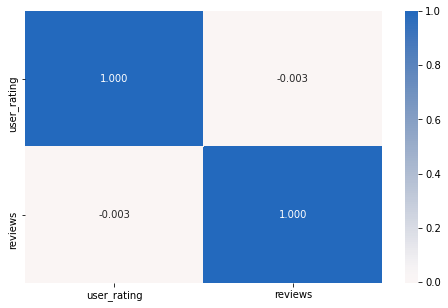

In [37]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

#### There is not correlation between reviews and_user rating at all.

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'b.ipynb'])

4294967295